In [2]:
#!pip3 install keras
#!pip3 install tensorflow

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [40]:
data = pd.read_pickle("./entrenamiento.pkl")

In [41]:
data

,0,1,filename,array,persona
0,1,0,65_02_01.png,"[[34, 43, 40, 31, 35, 43, 26, 25, 19, 19, 20, ...",0
1,1,0,101_03_01.png,"[[86, 107, 108, 108, 108, 107, 107, 108, 108, ...",0
2,1,0,209_02_02.png,"[[84, 84, 85, 85, 95, 84, 83, 85, 87, 93, 90, ...",0
3,1,0,227_03_03.png,"[[91, 100, 100, 101, 102, 102, 99, 105, 99, 96...",0
4,1,0,337_03_01.png,"[[15, 59, 121, 124, 124, 120, 88, 88, 95, 99, ...",0
...,...,...,...,...,...
5168,0,1,414_02_02.png,"[[175, 176, 178, 180, 182, 184, 186, 189, 192,...",1
5169,0,1,357_01_02.png,"[[98, 98, 99, 99, 99, 96, 90, 83, 76, 71, 70, ...",1
5170,0,1,287_02_02.png,"[[32, 32, 33, 33, 34, 35, 36, 37, 37, 37, 37, ...",1
5171,0,1,22_02_01.png,"[[64, 63, 60, 58, 57, 55, 53, 50, 47, 46, 46, ...",1


In [42]:
data.columns

Index([0, 1, 'filename', 'array', 'persona'], dtype='object')

In [43]:
img_rows, img_cols, img_channels = 128, 128, 1

In [44]:
data['array'][0].shape

(128, 128)

In [45]:
X = np.stack(data['array'])
X = X / 255

In [46]:
y = np.column_stack((data[0], data[1]))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
input_shape = (img_rows, img_cols, img_channels)
num_classes = 2

In [49]:
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4138, 128, 128, 1) (1035, 128, 128, 1) (4138, 2) (1035, 2)


In [51]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [52]:
batch_size = 20
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 4138 samples, validate on 1035 samples
Epoch 1/10
4138/4138 [==============================] - 186s 45ms/step - loss: 0.6270 - accuracy: 0.7175 - val_loss: 0.3019 - val_accuracy: 0.8251
Epoch 2/10
4138/4138 [==============================] - 189s 46ms/step - loss: 0.2373 - accuracy: 0.9219 - val_loss: 0.1072 - val_accuracy: 0.9691
Epoch 3/10
4138/4138 [==============================] - 185s 45ms/step - loss: 0.1003 - accuracy: 0.9717 - val_loss: 0.0376 - val_accuracy: 0.9903
Epoch 4/10
4138/4138 [==============================] - 185s 45ms/step - loss: 0.0534 - accuracy: 0.9841 - val_loss: 0.1229 - val_accuracy: 0.9507
Epoch 5/10
4138/4138 [==============================] - 185s 45ms/step - loss: 0.0478 - accuracy: 0.9831 - val_loss: 0.0186 - val_accuracy: 0.9942
Epoch 6/10
4138/4138 [==============================] - 185s 45ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.5965 - val_accuracy: 0.8783
Epoch 7/10
4138/4138 [==============================] - 186s 45ms/step

In [73]:
import time 
moment=time.localtime()
name='Model_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
model.save(name)

In [74]:
import json
model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)
model.save_weights(name)

Probs -> No:0.00119 Yes:0.99881


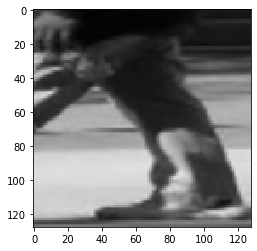

In [110]:
# Prueba con 1
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[333]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print("Probs -> No:{0:.5f} Yes:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(Image.fromarray(img.squeeze()*255),'gray')

In [112]:
# Check to see how X_test performed. Display it in a dataframe that compares predictions with ground truth
def predictOne(img):
    return model.predict(np.expand_dims(img,axis=0))[0]
    
pred_0 = []
pred_1 = []
for img in X_test:
    pred_0.append(int(round(predictOne(img)[0],0)))
    pred_1.append(int(round(predictOne(img)[1],0)))

prueba = pd.DataFrame(y_test.copy())

prueba['pred_0'] = pred_0
prueba['pred_1'] = pred_1
prueba

,0,1,pred_0,pred_1
0,1,0,1,0
1,0,1,0,1
2,1,0,1,0
3,1,0,1,0
4,0,1,0,1
...,...,...,...,...
1030,1,0,1,0
1031,1,0,1,0
1032,1,0,1,0
1033,1,0,1,0


In [113]:
prueba[prueba[0]!=prueba['pred_0']]

,0,1,pred_0,pred_1
20,1,0,0,1
61,1,0,0,1
119,1,0,0,1
193,1,0,0,1
367,1,0,0,1
372,1,0,0,1
405,1,0,0,1
537,1,0,0,1
1029,1,0,0,1


./Imagenes/yo_recortada/702_02_03.png
Probs -> No:0.99996 Yes:0.00004
./Imagenes/yo_recortada/6593_03_01.png
Probs -> No:0.02879 Yes:0.97121
./Imagenes/yo_recortada/702_02_02.png
Probs -> No:1.00000 Yes:0.00000
./Imagenes/yo_recortada/6593_03_02.png
Probs -> No:0.00199 Yes:0.99801
./Imagenes/yo_recortada/6593_03_03.png
Probs -> No:0.00787 Yes:0.99213
./Imagenes/yo_recortada/702_02_01.png
Probs -> No:1.00000 Yes:0.00000
./Imagenes/yo_recortada/6593_01_02.png


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


Probs -> No:0.00392 Yes:0.99608
./Imagenes/yo_recortada/6593_01_03.png
Probs -> No:0.30868 Yes:0.69132
./Imagenes/yo_recortada/6593_01_01.png
Probs -> No:0.07433 Yes:0.92567
./Imagenes/yo_recortada/6593_02_03.png
Probs -> No:0.00676 Yes:0.99324
./Imagenes/yo_recortada/702_03_01.png
Probs -> No:1.00000 Yes:0.00000
./Imagenes/yo_recortada/6593_02_02.png
Probs -> No:0.00354 Yes:0.99646
./Imagenes/yo_recortada/702_03_02.png
Probs -> No:0.99998 Yes:0.00002
./Imagenes/yo_recortada/702_03_03.png
Probs -> No:1.00000 Yes:0.00000
./Imagenes/yo_recortada/6593_02_01.png
Probs -> No:0.00592 Yes:0.99408
./Imagenes/yo_recortada/702_01_03.png
Probs -> No:0.99959 Yes:0.00041
./Imagenes/yo_recortada/703_01_02.png
Probs -> No:1.00000 Yes:0.00000


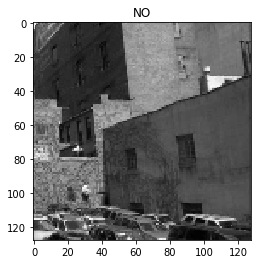

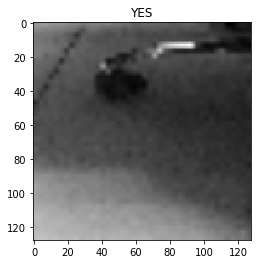

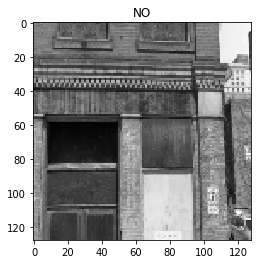

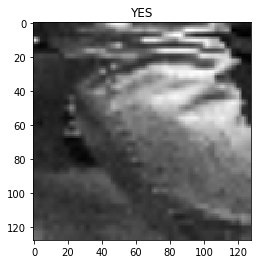

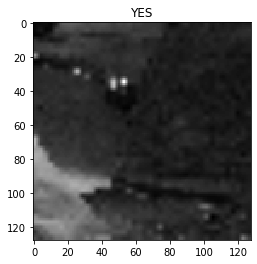

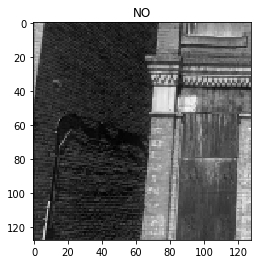

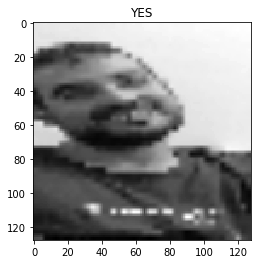

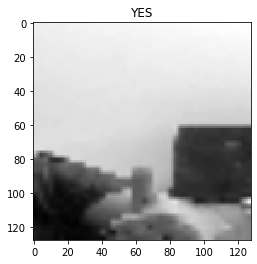

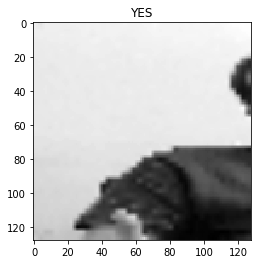

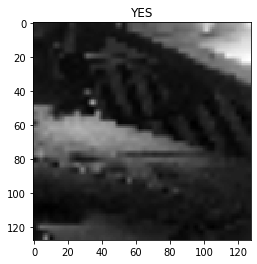

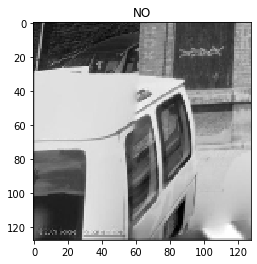

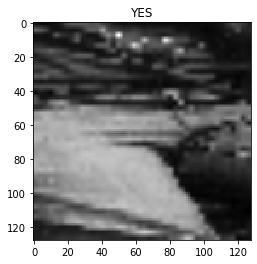

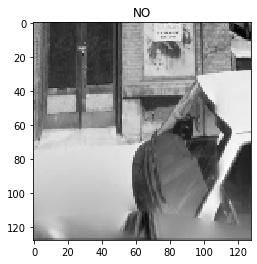

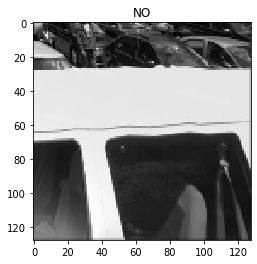

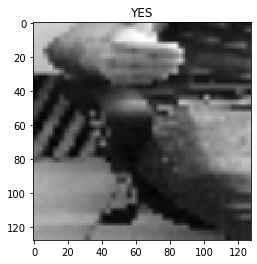

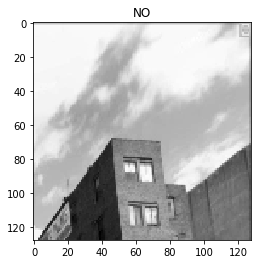

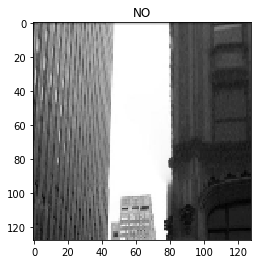

In [119]:
import cv2
import matplotlib.pyplot as plt
import glob
import os

def predictPersona(im):
    im = im / 255
    prepared_data = np.expand_dims(np.expand_dims(im,axis=3),axis=0)
    pred = model.predict(prepared_data)[0]
    print("Probs -> No:{0:.5f} Yes:{1:.5f}".format(pred[0],pred[1]))
    return 'NO' if pred[0]>pred[1] else 'YES'

path = "./Imagenes/yo_recortada"

files = glob.glob('{}/*.png'.format(path))
for file in files:
    print(file)
    im = cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY),(128,128))
    plt.figure()
    plt.imshow(im,cmap="gray")
    answer= predictPersona(im)
    plt.title(f"{answer}")